<a href="https://colab.research.google.com/github/Ghanshyam-02/computer-vision/blob/main/cats_vs_dogs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 41.2MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.2MB/s]


In [3]:
! unzip /content/dogs-vs-cats.zip -d /content/


Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [4]:
!pip3 install tensorflow numpy matplotlib keras

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

In [6]:
cat_directory_path = '/content/dogs_vs_cats/train/cats'
dog_directory_path = '/content/dogs_vs_cats/train/dogs'

array([[[ 39,  30,  26],
        [ 37,  28,  24],
        [ 32,  23,  19],
        ...,
        [155, 158, 126],
        [154, 157, 125],
        [154, 157, 125]],

       [[ 42,  33,  29],
        [ 42,  33,  29],
        [ 39,  30,  26],
        ...,
        [155, 158, 126],
        [154, 157, 125],
        [153, 156, 124]],

       [[ 43,  34,  30],
        [ 47,  38,  34],
        [ 48,  39,  35],
        ...,
        [156, 159, 127],
        [155, 158, 126],
        [153, 156, 124]],

       ...,

       [[114, 151, 165],
        [110, 149, 163],
        [103, 142, 156],
        ...,
        [  6, 170, 175],
        [  6, 166, 172],
        [  2, 160, 166]],

       [[111, 146, 160],
        [108, 145, 159],
        [102, 139, 153],
        ...,
        [  2, 171, 175],
        [  3, 167, 172],
        [  0, 161, 166]],

       [[105, 140, 154],
        [103, 140, 154],
        [ 99, 136, 150],
        ...,
        [  2, 171, 175],
        [  3, 167, 172],
        [  0, 161, 166]]], dtype=uint8)
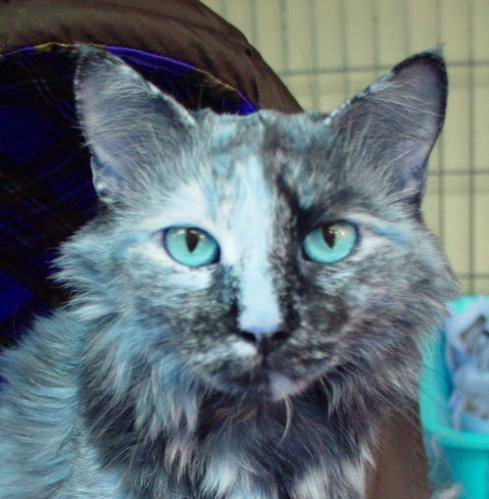

In [7]:
import cv2
img = cv2.imread('/content/test/cats/cat.10.jpg')
img

In [8]:
print(img)

[[[ 39  30  26]
  [ 37  28  24]
  [ 32  23  19]
  ...
  [155 158 126]
  [154 157 125]
  [154 157 125]]

 [[ 42  33  29]
  [ 42  33  29]
  [ 39  30  26]
  ...
  [155 158 126]
  [154 157 125]
  [153 156 124]]

 [[ 43  34  30]
  [ 47  38  34]
  [ 48  39  35]
  ...
  [156 159 127]
  [155 158 126]
  [153 156 124]]

 ...

 [[114 151 165]
  [110 149 163]
  [103 142 156]
  ...
  [  6 170 175]
  [  6 166 172]
  [  2 160 166]]

 [[111 146 160]
  [108 145 159]
  [102 139 153]
  ...
  [  2 171 175]
  [  3 167 172]
  [  0 161 166]]

 [[105 140 154]
  [103 140 154]
  [ 99 136 150]
  ...
  [  2 171 175]
  [  3 167 172]
  [  0 161 166]]]


In [9]:
# building the model

In [10]:
base_dir='/content/dogs_vs_cats/train'
 #All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [11]:
 # Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation',
    shuffle=False  # Disable shuffling for validation data
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [12]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 51s 51ms/step - accuracy: 0.5537 - loss: 0.6813 - val_accuracy: 0.6815 - val_loss: 0.5935
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 74s 50ms/step - accuracy: 0.7301 - loss: 0.5378 - val_accuracy: 0.6998 - val_loss: 0.5779
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.8052 - loss: 0.4160 - val_accuracy: 0.7970 - val_loss: 0.4391
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.8465 - loss: 0.3447 - val_accuracy: 0.8400 - val_loss: 0.3849
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step - accuracy: 0.8798 - loss: 0.2808 - val_accuracy: 0.8425 - val_loss: 0.3709
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.9097 - loss: 0.2174 - val_accuracy: 0.8627 - val_loss: 0.3784
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 39s 48ms/step - accuracy: 0.9367 - loss: 0.1577 - val_accuracy: 0.8705 - val_loss: 0.3362
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9600 - loss: 0.1047 - val_accurac